In [21]:
%pylab inline
import gc
import numpy as np
import astropy.io.fits as pyfits

import fpfsBase

Populating the interactive namespace from numpy and matplotlib


In [22]:
cd wrkDir/FPFS2/sim

[Errno 2] No such file or directory: 'wrkDir/FPFS2/sim'
/lustre/work/xiangchong.li/work/FPFS2/sim


In [113]:
gest=[]
C=10
slow=0.7
noiRev=True
dss=0.02
for ifield in range(2000):
    igroup=ifield//250
    fname1='sim20210301/fpfs-psfRcut-psf60-%d/src%04d-g1-2222.fits' %(igroup,ifield)
    moments1=pyfits.getdata(fname1)
    elli1=fpfsBase.fpfsM2E(moments1,C,rev=noiRev)
    mask=elli1['fpfs_s0']>slow
    elli1=elli1[mask]
    mask2=elli1['fpfs_s0']<slow+dss
    RS=-np.sqrt(2.)*np.sum((1-elli1[mask2]['fpfs_s0'])*elli1[mask2]['fpfs_e1']**2./dss)
    g1p=np.sum(elli1['fpfs_e1'])/(np.sum(elli1['fpfs_RE'])+RS)
    
    
    fname2='sim20210301/fpfs-psfRcut-psf60-%d/src%04d-g1-0000.fits' %(igroup,ifield)
    moments2=pyfits.getdata(fname2)
    elli2=fpfsBase.fpfsM2E(moments2,C,rev=noiRev)
    mask=elli2['fpfs_s0']>slow
    elli2=elli2[mask]
    mask2=elli2['fpfs_s0']<slow+dss
    RS=-np.sqrt(2.)*np.sum((1-elli2[mask2]['fpfs_s0'])*elli2[mask2]['fpfs_e1']**2./dss)
    g1m=np.sum(elli2['fpfs_e1'])/(np.sum(elli2['fpfs_RE'])+RS)
    
    gest.append(g1m-g1p)
    del elli1,elli2,moments1,moments2,mask,mask2
    gc.collect

In [114]:
np.average(gest)/0.04-1

8.766777351887356e-05

16.432127481997718


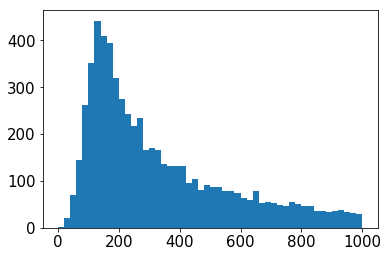

In [94]:
plt.hist(moments['fpfs_M00'],bins=50,range=(0,1e3))
print(moments['fpfs_M00'].min())

0.14283611727986065


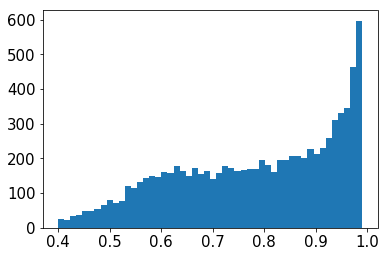

In [61]:
plt.hist(elli['fpfs_s0'],bins=50,range=(0.4,0.99))
print(elli['fpfs_s0'].min())

In [62]:
print(np.sum(elli['fpfs_s0']>0.999)/len(elli))

0.041
